# Project Five
# Game of Thrones - TSNE

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import spacy
from nltk import Tree
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph
from nltk.parse import ProjectiveDependencyParser
from nltk.parse import NonprojectiveDependencyParser
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from nltk.tag import pos_tag
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Using Theano backend.


In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [3]:
import pickle

with open('/Users/zoemarkovits/Metis/project_five_got/total_corpus_texts2.pkl', 'rb') as f:
    total_corpus_texts = pickle.load(f)

In [4]:
total_corpus_texts

[['well', 'struck'],
 ['well', 'struck', 'dog'],
 ['like'],
 ['well', 'struck', 'grace'],
 ['already', 'said', 'well', 'struck'],
 ['yes', 'grace'],
 ['ser', 'dontos', 'red', 'house', 'hollard'],
 ['ser', 'dontos', 'red', 'house', 'hollard'],
 [],
 ['sorry', 'grace'],
 ['deepest', u'apology'],
 ['drunk'],
 [],
 ['uh'],
 ['grace'],
 ['two', u'cup', 'wine'],
 ['two', u'cup'],
 ['thats', 'much'],
 ['please', 'another', 'cup'],
 ['sure', 'grace'],
 ['two'],
 ['much', 'like'],
 ['would', 'honored', 'grace'],
 ['ser', 'meryn', 'help', 'ser', 'dontos', 'celebrate', 'name', 'day'],
 ['see', u'drink', 'fill'],
 ['cant'],
 ['say'],
 ['say', 'cant'],
 ['meant', 'would', 'bad', 'luck', 'kill', 'man', 'name', 'day'],
 ['kind', 'stupid', u'peasant', 'superstition', 'take', 'away'],
 ['ill', 'killed', 'tomorrow', 'fool'],
 [],
 ['fool', 'youre', 'clever', 'see'],
 ['hell', 'make', 'much', 'better', 'fool', 'knight'],
 ['doesnt', 'deserve', 'mercy', 'quick', 'death'],
 ['hear', 'lady', 'ser', 'dontos'

In [5]:
import gensim  
model = gensim.models.Word2Vec(total_corpus_texts, size=100, window=5, min_count=1, workers=2,sg=1)

In [6]:
model.wv.vocab.items()

[('foul', <gensim.models.keyedvectors.Vocab at 0x10e9376d0>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x11ecadb10>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x11ecad550>),
 ('marching', <gensim.models.keyedvectors.Vocab at 0x11ecada50>),
 (u'increase', <gensim.models.keyedvectors.Vocab at 0x12041c8d0>),
 ('midafternoon', <gensim.models.keyedvectors.Vocab at 0x11ecadc10>),
 ('mutinied', <gensim.models.keyedvectors.Vocab at 0x11ecadad0>),
 ('lord', <gensim.models.keyedvectors.Vocab at 0x11ecadd90>),
 (u'sinking', <gensim.models.keyedvectors.Vocab at 0x11ecada90>),
 ('leisurely', <gensim.models.keyedvectors.Vocab at 0x11ecadb50>),
 (u'politician', <gensim.models.keyedvectors.Vocab at 0x11ecad8d0>),
 ('stabbed', <gensim.models.keyedvectors.Vocab at 0x11ecad990>),
 ('bringing', <gensim.models.keyedvectors.Vocab at 0x120230590>),
 ('disturb', <gensim.models.keyedvectors.Vocab at 0x11ecade50>),
 ('prize', <gensim.models.keyedvectors.Vocab at 0x11ecaddd0>),
 ('wooden', <gensim

In [7]:
model.wv.vocab.keys()

['foul',
 'four',
 'hanging',
 'marching',
 u'increase',
 'midafternoon',
 'mutinied',
 'lord',
 u'sinking',
 'leisurely',
 u'politician',
 'stabbed',
 'bringing',
 'disturb',
 'prize',
 'wooden',
 u'clientele',
 'succession',
 'straight',
 'tired',
 u'lefford',
 'bacon',
 'elegant',
 'second',
 'sailed',
 u'ruthless',
 'thunder',
 'cooking',
 'contributed',
 'resilient',
 'succumb',
 'hero',
 'interrupting',
 u'here',
 'substance',
 u'k',
 'climbed',
 'military',
 u'climber',
 'diplomat',
 'appropriately',
 'divide',
 'explained',
 'replace',
 'brought',
 'stern',
 'cheating',
 'spoke',
 u'cannibal',
 'occupying',
 'untie',
 'strike',
 'sideface',
 'holy',
 'relax',
 'successful',
 'brings',
 'hereby',
 'hurt',
 u'glass',
 u'hole',
 'hold',
 u'simper',
 u'benjens',
 'pursue',
 'zhoan',
 'blade',
 'plunged',
 'sweeter',
 'rework',
 'example',
 'triple',
 'organized',
 u'caution',
 'want',
 'counseling',
 'mymother',
 u'cocksucker',
 'absolute',
 'hog',
 'complaining',
 u'travel',
 'cop

In [9]:
model_list = []

for i in model.wv.vocab.keys():
    model_list.append(model.wv[i])

In [10]:
model_list

[array([-0.22734848, -0.02274841, -0.03192084, -0.13213485, -0.11684443,
        -0.10885459, -0.10633185, -0.1973353 , -0.01205357, -0.18141153,
         0.04264311, -0.12058117,  0.12256242, -0.11095059,  0.00164567,
         0.1595013 ,  0.07759829, -0.08567992, -0.09799398, -0.02394623,
        -0.23817079, -0.12795793, -0.02000308,  0.18798596,  0.15834382,
        -0.13581286, -0.04246422, -0.09285914, -0.05010182, -0.10763414,
        -0.26760501,  0.02824675,  0.01796   , -0.10293259,  0.04118451,
        -0.04490276, -0.17591125, -0.07139485,  0.07516934,  0.17434663,
        -0.12740977,  0.0156004 , -0.01576055, -0.16327721,  0.12990974,
        -0.25118831,  0.08547899, -0.01438967, -0.01903926,  0.1485323 ,
         0.22047009,  0.08155277, -0.13049448, -0.03320205, -0.13986261,
        -0.14665267,  0.01938605,  0.04096953, -0.18374008, -0.15918273,
         0.12911758, -0.0443539 ,  0.20955108, -0.12389187,  0.05936328,
        -0.1223526 , -0.03115181,  0.01678536,  0.0

In [11]:
model_vectors = pd.DataFrame(model_list)
model_vectors.shape

(6913, 100)

In [12]:
model_vectors = model_vectors.reset_index()

In [13]:
model_vectors['index'] = model.wv.vocab.keys()

In [14]:
model_vectors = model_vectors.set_index('index')

In [15]:
model_vectors.head()

0         1         2         3         4         5   \
index                                                                  
foul     -0.227348 -0.022748 -0.031921 -0.132135 -0.116844 -0.108855   
four     -0.308133 -0.030978 -0.043079 -0.187027 -0.147836 -0.140025   
hanging  -0.151221 -0.020682 -0.022413 -0.088994 -0.070946 -0.073776   
marching -0.287961 -0.021104 -0.040261 -0.167429 -0.143008 -0.134391   
increase -0.053263 -0.000538 -0.011278 -0.032747 -0.026203 -0.025140   

                6         7         8         9     ...           90  \
index                                               ...                
foul     -0.106332 -0.197335 -0.012054 -0.181412    ...     0.035260   
four     -0.152644 -0.272066 -0.028142 -0.240630    ...     0.047810   
hanging  -0.076421 -0.130453 -0.013585 -0.112496    ...     0.026866   
marching -0.143650 -0.266373 -0.029403 -0.225230    ...     0.046018   
increase -0.028630 -0.055006 -0.006999 -0.043935    ...     0.012420   

                91        92        93        94        95        96  \
index                                                                  
foul     -0.005630 -0.166717 -0.139884 -0.043533  0.131457 -0.184855   
four     -0.011332 -0.227886 -0.185361 -0.057243  0.180777 -0.257185   
hanging  -0.002189 -0.114250 -0.088434 -0.036014  0.091575 -0.129315   
marching -0.004155 -0.209439 -0.179424 -0.064052  0.168700 -0.240126   
increase -0.005476 -0.036459 -0.036896 -0.015185  0.029795 -0.042562   

                97        98        99  
index                                   
foul     -0.008847 -0.156338  0.040658  
four     -0.001546 -0.203124  0.049584  
hanging  -0.003738 -0.097730  0.020513  
marching -0.010947 -0.192614  0.048529  
increase  0.002786 -0.040991  0.010211  

[5 rows x 100 columns]

In [16]:
pca20 = PCA(n_components=20)

pca_results20 = pca20.fit_transform(model_vectors)

In [17]:
pca_results_20 = pd.DataFrame(pca_results20)

In [18]:
pca_results_20 = pca_results_20.reset_index()

In [20]:
pca_results_20['index'] = model.wv.vocab.keys()

In [21]:
pca_results_20 = pca_results_20.set_index('index')

In [22]:
pca_results_20.head()

0         1         2         3         4         5   \
index                                                                  
foul      0.466164 -0.004241 -0.029383  0.001997  0.007994 -0.007967   
four      0.862427 -0.013954 -0.018760  0.027812  0.007532 -0.000938   
hanging   0.069150 -0.003843 -0.011289  0.009442  0.000551  0.000982   
marching  0.782270 -0.000466 -0.002600  0.029265 -0.007757 -0.009118   
increase -0.419327  0.002046  0.002757 -0.001476 -0.000924  0.007497   

                6         7         8         9         10        11  \
index                                                                  
foul      0.004210  0.003179 -0.000068 -0.002277 -0.001553 -0.004802   
four      0.000772  0.013391 -0.003197  0.008574 -0.008752 -0.003175   
hanging   0.006007 -0.003604 -0.005626 -0.003291 -0.006278  0.000274   
marching -0.013787 -0.004805 -0.008338 -0.003497  0.000996  0.000482   
increase  0.000436  0.001080 -0.003947 -0.000035 -0.000257  0.002746   

                12        13        14        15        16        17  \
index                                                                  
foul     -0.004327 -0.006375 -0.001643 -0.000757 -0.001982 -0.001486   
four     -0.000368 -0.002060  0.001996  0.002979  0.001499  0.004406   
hanging  -0.004914 -0.002176 -0.002328 -0.002144  0.005001  0.000268   
marching -0.002337  0.007886  0.003716  0.000442 -0.002033 -0.001644   
increase  0.004778  0.001073 -0.002841  0.000658 -0.006676  0.003510   

                18        19  
index                         
foul      0.001804 -0.002266  
four     -0.002499  0.006589  
hanging  -0.003759 -0.005203  
marching  0.002644  0.006627  
increase  0.001087  0.001405

In [23]:
tsne = TSNE(n_components=2)

tsne_pca_results20 = tsne.fit_transform(pca_results20)

In [24]:
tsne_pca_results_20 = pd.DataFrame(tsne_pca_results20)

In [25]:
tsne_pca_results_20 = tsne_pca_results_20.reset_index()

In [27]:
tsne_pca_results_20['index'] = model.wv.vocab.keys()

In [28]:
tsne_pca_results_20 = tsne_pca_results_20.set_index('index')

In [29]:
tsne_pca_results_20.head(10)

0             1
index                                   
foul          2.627026e+16 -5.088883e+15
four         -3.905450e+16  7.740059e+16
hanging       8.741687e+16 -1.574284e+17
marching      2.508176e+16  6.711072e+15
increase     -4.326863e+18 -1.717717e+18
midafternoon  1.551103e+15  4.348303e+16
mutinied      2.358794e+16  9.703822e+16
lord          9.190351e+16 -3.390594e+16
sinking       2.652186e+17 -2.008444e+18
leisurely     2.096185e+17  3.249580e+17

In [30]:
tsne_pca_results20

array([[  2.62702626e+16,  -5.08888332e+15],
       [ -3.90544953e+16,   7.74005897e+16],
       [  8.74168683e+16,  -1.57428412e+17],
       ..., 
       [  1.10337543e+16,  -3.97210187e+16],
       [  1.95529753e+16,  -2.27440613e+16],
       [  8.32042319e+15,   2.05273290e+16]])

In [31]:
tsne_pca_results_20.index

Index([        u'foul',         u'four',      u'hanging',     u'marching',
           u'increase', u'midafternoon',     u'mutinied',         u'lord',
            u'sinking',    u'leisurely',
       ...
              u'lance',       u'risked',       u'squeak',       u'oberyn',
              u'cliff',    u'auxiliary',        u'wylla',    u'firestorm',
         u'baratheons',  u'furthermore'],
      dtype='object', name=u'index', length=6913)

<IPython.core.display.Javascript object>


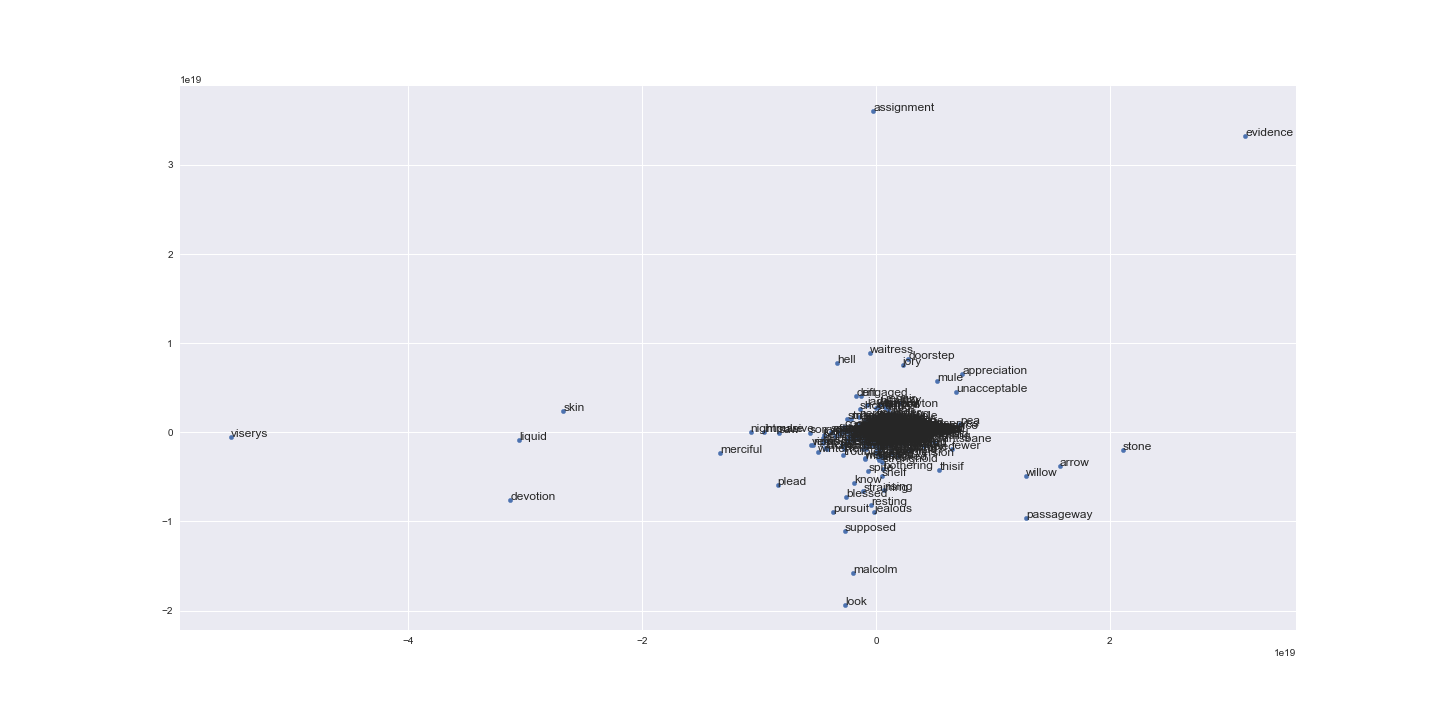

In [32]:
import numpy as Math
import pylab as Plot
import matplotlib.pyplot as plt

rows = tsne_pca_results_20.index
%matplotlib notebook
plt.ion()

Plot.figure(figsize=(20, 10))
max_x = Math.amax(tsne_pca_results20, axis=0)[0]
max_y = Math.amax(tsne_pca_results20, axis=0)[1]
#Plot.xlim((-.125e+20,.25e+20))
#Plot.ylim((-.125+e20,.1e20))

Plot.scatter(tsne_pca_results20[:, 0], tsne_pca_results20[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results20[row_id, 0]
    y = tsne_pca_results20[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_2002.png");